In [3]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARMA,ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [5]:
df = pd.read_csv('Weekly_Pharmaceutical_sales.csv')
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
1,1/12/2014,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2,1/19/2014,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
3,1/26/2014,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
4,2/2/2014,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


In [6]:
df.tail()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
297,9/15/2019,35.51,30.977,19.65,178.375,67.2,5.0,30.000000,30.50
298,9/22/2019,46.84,25.396,24.40,248.250,31.2,3.0,26.000000,21.00
299,9/29/2019,34.01,22.498,26.60,336.700,61.2,1.0,40.416667,23.10
300,10/6/2019,38.70,32.502,19.25,249.450,69.0,5.0,30.000000,12.13
301,10/13/2019,7.67,6.237,3.50,95.100,26.0,2.0,12.000000,1.00


In [7]:
df.shape

(302, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   302 non-null    object 
 1   M01AB   302 non-null    float64
 2   M01AE   302 non-null    float64
 3   N02BA   302 non-null    float64
 4   N02BE   302 non-null    float64
 5   N05B    302 non-null    float64
 6   N05C    302 non-null    float64
 7   R03     302 non-null    float64
 8   R06     302 non-null    float64
dtypes: float64(8), object(1)
memory usage: 21.4+ KB


In [10]:
time = pd.date_range(start='1/5/2014',periods=302,freq='W')
df['time_stamp'] = pd.DataFrame(time)
df.drop('datum',axis=1,inplace=True)
df = df.set_index('time_stamp')

In [11]:
df.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
time_stamp,,,,,,,,
2014-01-05,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
2014-01-12,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2014-01-19,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
2014-01-26,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
2014-02-02,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


In [12]:
df.tail()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
time_stamp,,,,,,,,
2019-09-15,35.51,30.977,19.65,178.375,67.2,5.0,30.000000,30.50
2019-09-22,46.84,25.396,24.40,248.250,31.2,3.0,26.000000,21.00
2019-09-29,34.01,22.498,26.60,336.700,61.2,1.0,40.416667,23.10
2019-10-06,38.70,32.502,19.25,249.450,69.0,5.0,30.000000,12.13
2019-10-13,7.67,6.237,3.50,95.100,26.0,2.0,12.000000,1.00


In [13]:
df = df[['N02BE']]
df

,N02BE
time_stamp,
2014-01-05,185.950
2014-01-12,190.700
2014-01-19,218.400
2014-01-26,179.600
2014-02-02,159.880
...,...
2019-09-15,178.375
2019-09-22,248.250
2019-09-29,336.700


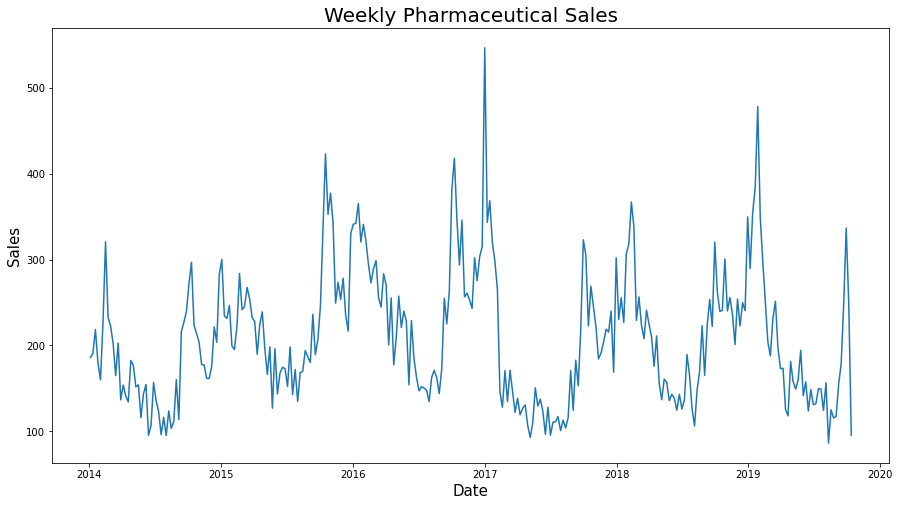

In [15]:
plt.plot(df)
plt.title('Weekly Pharmaceutical Sales',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.show()

In [16]:
plt.rcParams['figure.figsize'] = [15,8]

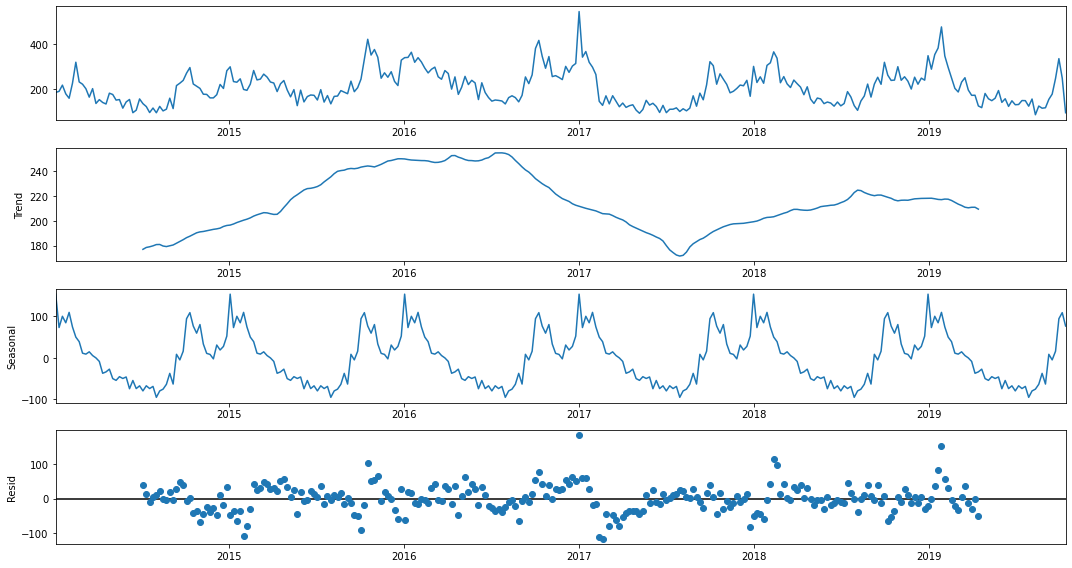

In [17]:
decomposition_model = seasonal_decompose(df,model='additive')
decomposition_model.plot();

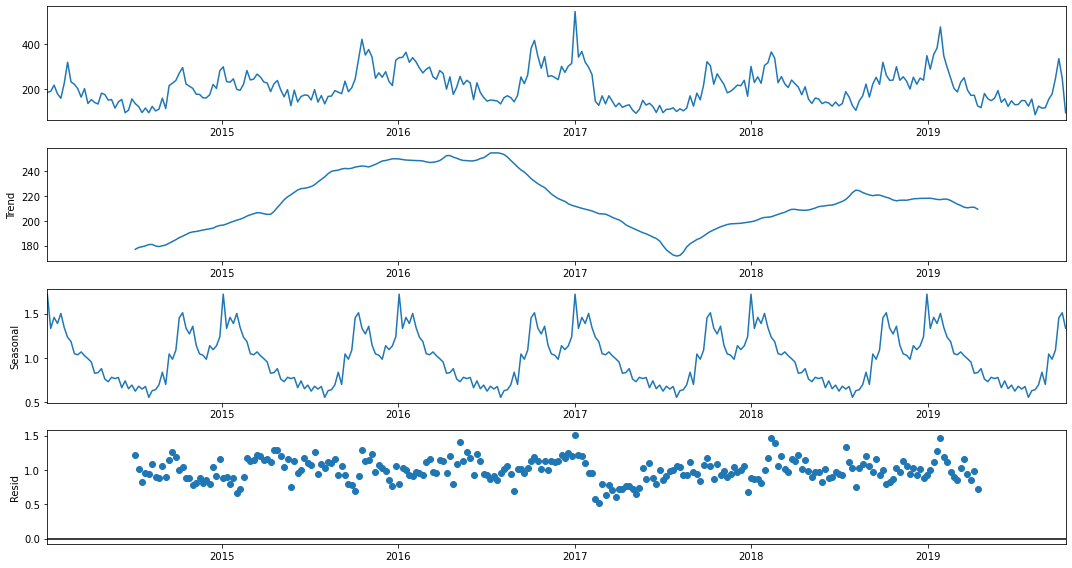

In [18]:
decomposition_model = seasonal_decompose(df,model='multiplicative')
decomposition_model.plot();

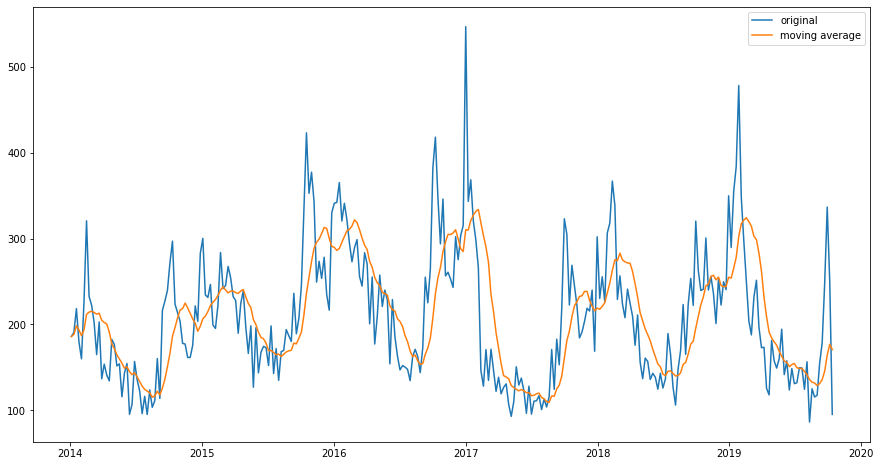

In [19]:
plt.plot(df,label='original')
plt.plot(df.rolling(10,min_periods=0).mean(),label='moving average')
plt.legend(loc='best')
plt.show()

In [15]:
# Model building - Exponential Smoothing Techniques

In [20]:
train_end = datetime(2019,3,13)
test_end = datetime(2021,10,13)

In [21]:
train = df[:train_end]
test = df[train_end + timedelta(days=1):test_end]

In [22]:
train.tail()

,N02BE
time_stamp,
2019-02-10,297.450
2019-02-17,249.912
2019-02-24,204.000
2019-03-03,187.800
2019-03-10,231.900


In [23]:
test.tail()

,N02BE
time_stamp,
2019-09-15,178.375
2019-09-22,248.250
2019-09-29,336.700
2019-10-06,249.450
2019-10-13,95.100


In [24]:
len(train)

271

In [25]:
len(test)

31

##### Simple Exponential Smoothing

In [62]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(smoothing_level=0.7586881)
SES_model.summary()

Dep. Variable:,N02BE,No. Observations:,271
Model:,SimpleExpSmoothing,SSE,550817.212
Optimized:,True,AIC,2068.218
Trend:,None,BIC,2075.422
Seasonal:,None,AICC,2068.368
Seasonal Periods:,None,Date:,"Thu, 24 Mar 2022"
Box-Cox:,False,Time:,12:34:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7586881,alpha,False
initial_level,188.16619,l.0,True


In [63]:
SES_predict = SES_model.forecast(len(test))

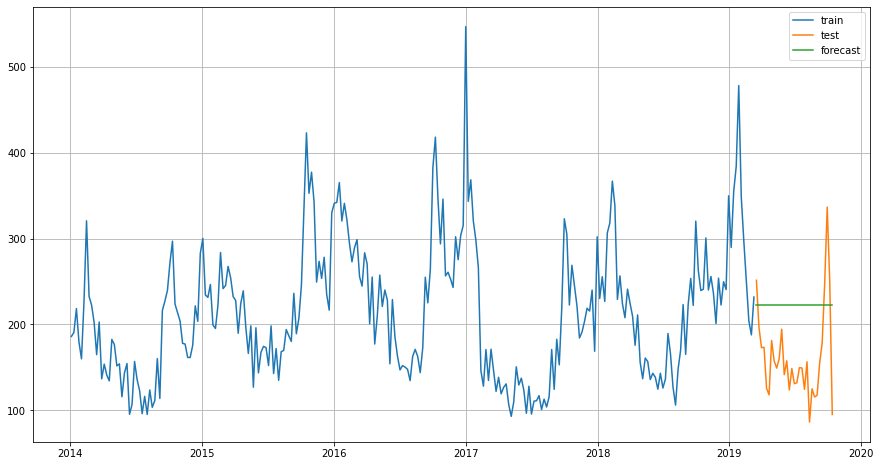

In [64]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [65]:
print("MAE:",MAE(test['N02BE'],SES_predict))
print("MAPE:",MAPE(test['N02BE'],SES_predict))

MAE: 74.24999618916577
MAPE: 54.39120272451492


##### Double Exponential Smoothing

In [98]:
DES = Holt(train,exponential=False,initialization_method='estimated')
DES_model = DES.fit(smoothing_level=0.7586881,
                   smoothing_trend=0.0801409)
DES_model.summary()

Dep. Variable:,N02BE,No. Observations:,271
Model:,Holt,SSE,584686.489
Optimized:,True,AIC,2088.389
Trend:,Additive,BIC,2102.797
Seasonal:,None,AICC,2088.707
Seasonal Periods:,None,Date:,"Thu, 24 Mar 2022"
Box-Cox:,False,Time:,12:49:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7586881,alpha,False
smoothing_trend,0.0801409,beta,False


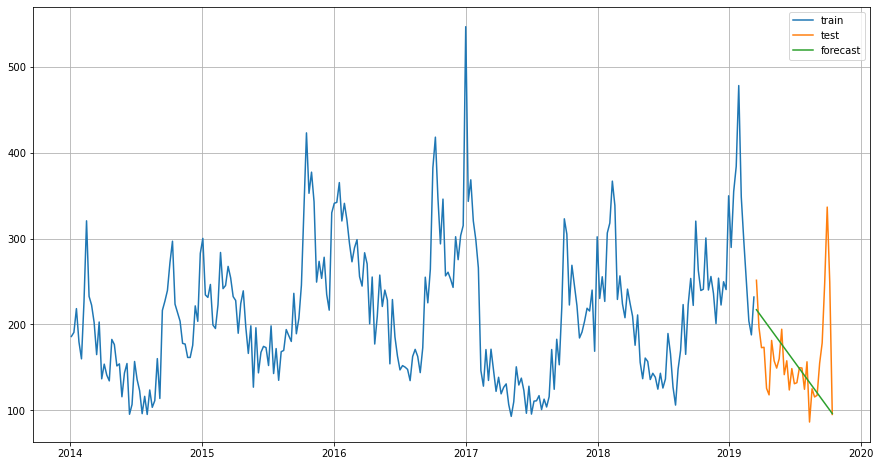

In [99]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [100]:
print("MAE:",MAE(test['N02BE'],DES_predict))
print("MAPE:",MAPE(test['N02BE'],DES_predict))

MAE: 40.7344464398302
MAPE: 22.92914619708165


##### Triple Exponential Smoothing

In [283]:
TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',
                           initialization_method='estimated')
TES_model = TES.fit(smoothing_level=0.6155555,
smoothing_trend=0.01333,
smoothing_seasonal=0.0030832)
TES_model.summary()

Dep. Variable:,N02BE,No. Observations:,271
Model:,ExponentialSmoothing,SSE,343672.961
Optimized:,True,AIC,2048.384
Trend:,Additive,BIC,2250.102
Seasonal:,Additive,AICC,2080.667
Seasonal Periods:,52,Date:,"Thu, 24 Mar 2022"
Box-Cox:,False,Time:,13:11:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6155555,alpha,False
smoothing_trend,0.0133300,beta,False


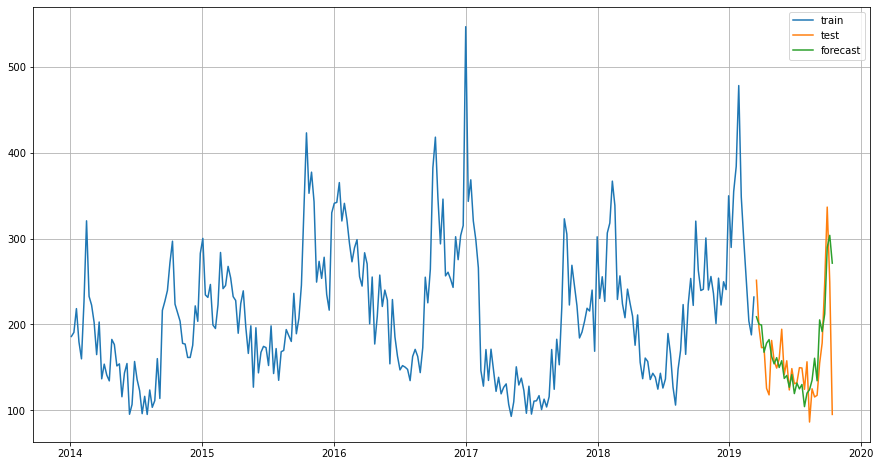

In [284]:
TES_predict = TES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [286]:
print("MAE:",MAE(test['N02BE'],TES_predict))
print("MAPE:",MAPE(test['N02BE'],TES_predict))

MAE: 29.289330147328727
MAPE: 21.29024478269793


##### ACF and PACF plots

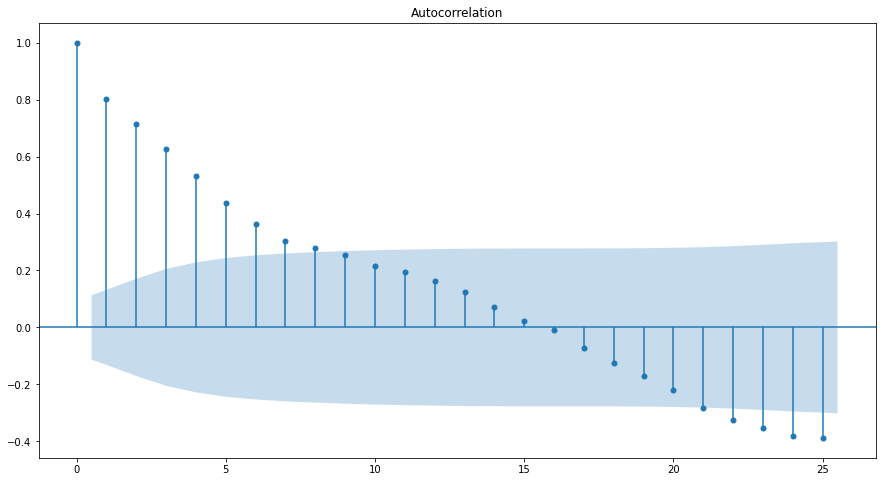

In [287]:
plot_acf(df)
plt.show()

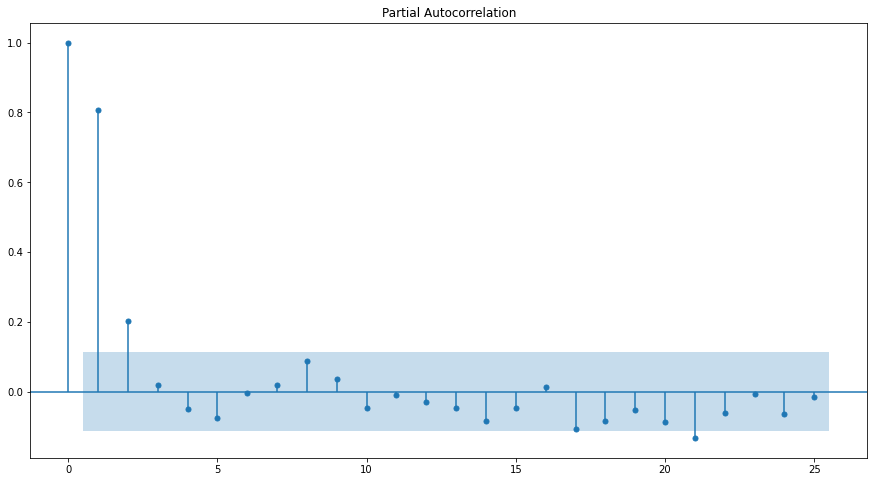

In [288]:
plot_pacf(df)
plt.show()

##### DickyFuller test

In [289]:
observations = df.values
df_results = adfuller(observations)
df_results

(-4.37060428760712,
 0.000334481141251771,
 1,
 300,
 {'1%': -3.4523371197407404,
  '5%': -2.871222860740741,
  '10%': -2.571929211111111},
 2975.5782505270445)

In [290]:
##### Stationary series -- proceed with ARMA model

##### ARMA Model - 1

In [376]:
model=ARMA(train,(2,2))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  N02BE   No. Observations:                  271
Model:                     ARMA(2, 2)   Log Likelihood               -1406.942
Method:                       css-mle   S.D. of innovations             43.401
Date:                Thu, 24 Mar 2022   AIC                           2825.885
Time:                        13:41:05   BIC                           2847.497
Sample:                    01-05-2014   HQIC                          2834.562
                         - 03-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         213.6789     14.347     14.894      0.000     185.560     241.798
ar.L1.N02BE     1.3831      0.193      7.151      0.000       1.004       1.762
ar.L2.N02BE    -0.4770      0.175     -2.727    

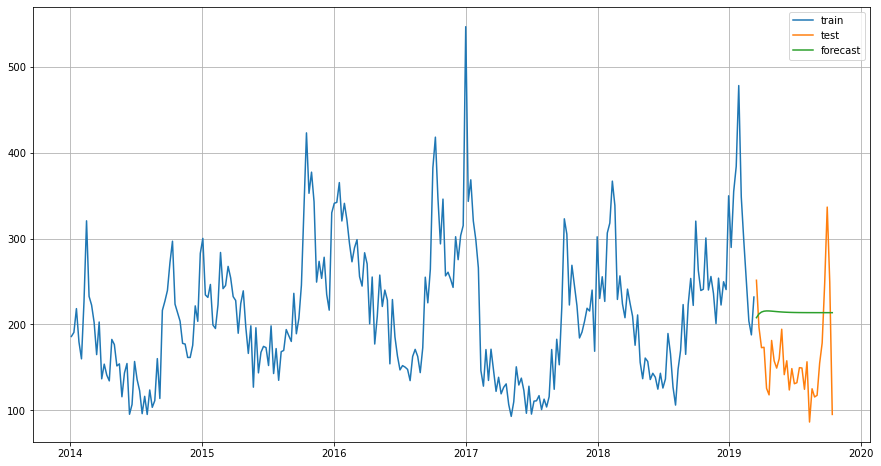

In [377]:
forecasted_values_arma = pd.Series(model_fit.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arma,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [378]:
print("MAE:",MAE(test['N02BE'],forecasted_values_arma))
print("MAPE:",MAPE(test['N02BE'],forecasted_values_arma))

MAE: 67.91674550954616
MAPE: 49.36188787910228


##### ARMA Model - 2

In [379]:
model=ARMA(train,(6,5))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  N02BE   No. Observations:                  271
Model:                     ARMA(6, 5)   Log Likelihood               -1396.625
Method:                       css-mle   S.D. of innovations             41.681
Date:                Thu, 24 Mar 2022   AIC                           2819.249
Time:                        13:42:07   BIC                           2866.077
Sample:                    01-05-2014   HQIC                          2838.051
                         - 03-10-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         216.8299      9.567     22.664      0.000     198.078     235.582
ar.L1.N02BE     2.7219        nan        nan        nan         nan         nan
ar.L2.N02BE    -1.9087        nan        nan    

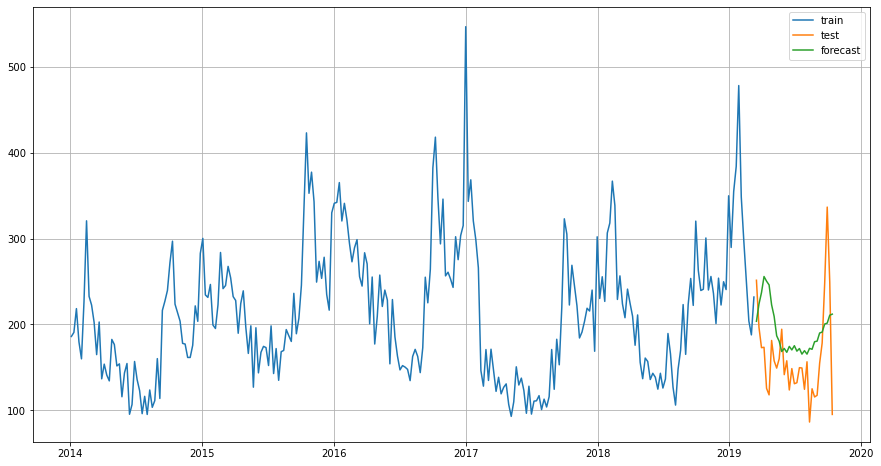

In [380]:
forecasted_values_arma = pd.Series(model_fit.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arma,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [381]:
print("MAE:",MAE(test['N02BE'],forecasted_values_arma))
print("MAPE:",MAPE(test['N02BE'],forecasted_values_arma))

MAE: 51.09955665472776
MAPE: 36.10338302481441


##### SARIMA Model

In [411]:
import itertools
p = q = range(0,3)
d = range(0,1)
pdq = list(itertools.product(p,d,q))
pdq_seasonal = [(x[0],x[1],x[2],21) for x in list(itertools.product(p,d,q))]

df_score = pd.DataFrame(columns=['param','seasonal','aic'])
df_score

,param,seasonal,aic


In [412]:
for param in pdq:
    for seasonal_param in pdq_seasonal:
        model = SARIMAX(train,
                       order = param,
                       seasonal_order = seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        sarimax_results = model.fit()
        print("SARIMAX",param,seasonal_param,'AIC:',sarimax_results.aic)
        df_score = df_score.append({'param':param,'seasonal':seasonal_param,'aic':sarimax_results.aic},ignore_index=True)

SARIMAX (0, 0, 0) (0, 0, 0, 21) AIC: 3698.680755202956
SARIMAX (0, 0, 0) (0, 0, 1, 21) AIC: 3288.78020663354
SARIMAX (0, 0, 0) (0, 0, 2, 21) AIC: 2927.6114344543785
SARIMAX (0, 0, 0) (1, 0, 0, 21) AIC: 3108.2253207407075
SARIMAX (0, 0, 0) (1, 0, 1, 21) AIC: 2938.0832878628307
SARIMAX (0, 0, 0) (1, 0, 2, 21) AIC: 2690.69099281179
SARIMAX (0, 0, 0) (2, 0, 0, 21) AIC: 2739.268966548659
SARIMAX (0, 0, 0) (2, 0, 1, 21) AIC: 2691.535998550215
SARIMAX (0, 0, 0) (2, 0, 2, 21) AIC: 2679.8977265769518
SARIMAX (0, 0, 1) (0, 0, 0, 21) AIC: 3409.511018466274
SARIMAX (0, 0, 1) (0, 0, 1, 21) AIC: 3068.365232524052
SARIMAX (0, 0, 1) (0, 0, 2, 21) AIC: 2754.269038631375
SARIMAX (0, 0, 1) (1, 0, 0, 21) AIC: 2953.9158034013403
SARIMAX (0, 0, 1) (1, 0, 1, 21) AIC: 2796.003014581429
SARIMAX (0, 0, 1) (1, 0, 2, 21) AIC: 2565.312833174605
SARIMAX (0, 0, 1) (2, 0, 0, 21) AIC: 2622.3034344392663
SARIMAX (0, 0, 1) (2, 0, 1, 21) AIC: 2578.27091734341
SARIMAX (0, 0, 1) (2, 0, 2, 21) AIC: 2556.4949630347865
SARIMA

In [413]:
df_score.sort_values('aic')

,param,seasonal,aic
47,"(1, 0, 2)","(0, 0, 2, 21)",2382.274277
50,"(1, 0, 2)","(1, 0, 2, 21)",2384.219761
74,"(2, 0, 2)","(0, 0, 2, 21)",2384.239652
77,"(2, 0, 2)","(1, 0, 2, 21)",2386.174844
53,"(1, 0, 2)","(2, 0, 2, 21)",2386.219433
...,...,...,...
3,"(0, 0, 0)","(1, 0, 0, 21)",3108.225321
18,"(0, 0, 2)","(0, 0, 0, 21)",3228.568637
1,"(0, 0, 0)","(0, 0, 1, 21)",3288.780207
9,"(0, 0, 1)","(0, 0, 0, 21)",3409.511018


In [421]:
model = SARIMAX(train,
                       order = (1,0,2),
                       seasonal_order = (0,0,2,21),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()
print(sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              N02BE   No. Observations:                  271
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 21)   Log Likelihood               -1185.137
Date:                            Thu, 24 Mar 2022   AIC                           2382.274
Time:                                    14:36:58   BIC                           2402.797
Sample:                                01-05-2014   HQIC                          2390.557
                                     - 03-10-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9909      0.010     98.261      0.000       0.971       1.011
ma.L1         -0.3061      0.052   

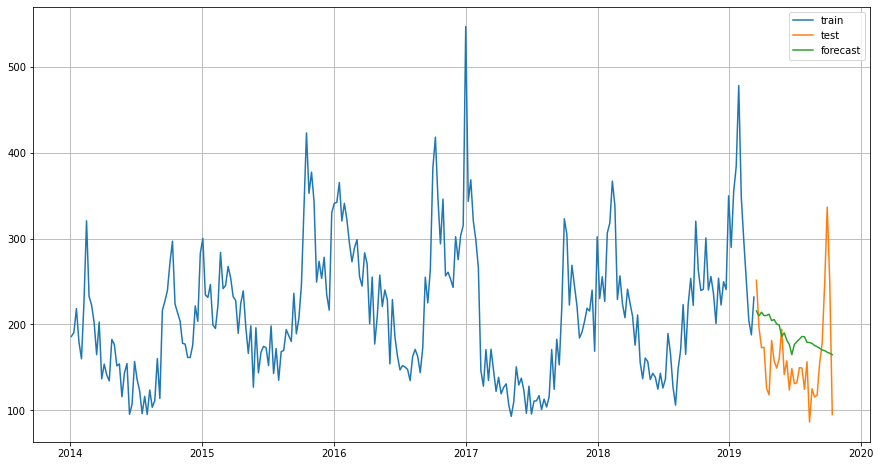

In [422]:
forecast = sarimax_results.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [423]:
print("MAE:",MAE(test['N02BE'],forecast))
print("MAPE:",MAPE(test['N02BE'],forecast))

MAE: 50.15307128234
MAPE: 34.190935853641705
